# MLP Test 8

Explorando `MLPClassifier` com `GridSearchCV`, utilizando o conunto de dados da **iris** para obter melhor combinação de **três** camadas ocultas e utilizá-la em 30 rodadas de classificação.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix, plot_confusion_matrix

## Carregando dados

In [2]:
irisDS = load_iris()
X, y = load_iris(return_X_y=True)

## Explorando `GridSearchCV`

In [3]:
X_pre_train, X_pre_test, y_train, y_test = train_test_split(X, y, random_state=6, test_size=0.3)

combinations = [(layer1, layer2, layer3) for layer1 in range(20, 110, 10) for layer2 in range(20, 110, 10) for layer3 in range(20, 110, 10)]
# Pré-processando dados
sc = StandardScaler().fit(X_pre_train)

X_train = sc.transform(X_pre_train)
X_test = sc.transform(X_pre_test)

# Instanciando GridSearch
grid_search = GridSearchCV(
    estimator=MLPClassifier(),
    param_grid={'hidden_layer_sizes':combinations},
    cv=7
).fit(
    X=X_train,
    y=y_train
)

resultsDF = pd.DataFrame(grid_search.cv_results_)

resultsDF.sort_values(by=['rank_test_score', 'param_hidden_layer_sizes'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
37,0.728187,0.048414,0.001307,0.000332,"(20, 60, 30)","{'hidden_layer_sizes': (20, 60, 30)}",1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.866667,0.980952,0.046657,1
9,0.711573,0.069527,0.001454,0.000570,"(20, 30, 20)","{'hidden_layer_sizes': (20, 30, 20)}",0.933333,1.0,1.000000,1.000000,1.000000,1.000000,0.866667,0.971429,0.048562,2
15,0.675705,0.044865,0.001518,0.000491,"(20, 30, 80)","{'hidden_layer_sizes': (20, 30, 80)}",0.933333,1.0,1.000000,1.000000,0.933333,1.000000,0.933333,0.971429,0.032991,2
48,0.898708,0.053383,0.002620,0.001602,"(20, 70, 50)","{'hidden_layer_sizes': (20, 70, 50)}",0.933333,1.0,0.933333,1.000000,1.000000,1.000000,0.933333,0.971429,0.032991,2
67,0.851357,0.102442,0.001860,0.001100,"(20, 90, 60)","{'hidden_layer_sizes': (20, 90, 60)}",0.933333,1.0,1.000000,1.000000,0.933333,1.000000,0.933333,0.971429,0.032991,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,0.352897,0.039763,0.000826,0.000026,"(100, 80, 90)","{'hidden_layer_sizes': (100, 80, 90)}",0.933333,1.0,0.933333,0.933333,0.866667,1.000000,0.866667,0.933333,0.050395,680
715,0.353181,0.027634,0.000812,0.000015,"(100, 90, 60)","{'hidden_layer_sizes': (100, 90, 60)}",0.933333,1.0,0.933333,0.933333,0.866667,1.000000,0.866667,0.933333,0.050395,680
725,0.364998,0.023429,0.001053,0.000512,"(100, 100, 70)","{'hidden_layer_sizes': (100, 100, 70)}",0.933333,1.0,0.933333,0.933333,0.866667,1.000000,0.866667,0.933333,0.050395,680
5,0.712258,0.113806,0.001679,0.000594,"(20, 20, 70)","{'hidden_layer_sizes': (20, 20, 70)}",0.933333,1.0,0.933333,0.933333,0.866667,0.933333,0.866667,0.923810,0.042592,728


In [4]:
best_hidden_layer_sizes = grid_search.best_params_['hidden_layer_sizes']
grid_search.best_params_

{'hidden_layer_sizes': (20, 60, 30)}

### Conclusão

Nesta rodada de `GridSearch`, houve uma rede em primeiro lugar, com `(20, 60, 30)` neurônios, com aproximadamente 98% de média de acurácia com 4% de desvio padrão.

Além disso outras 36 obtiveram como média de acurácia por volta de 96 ou 97% com aproximadamente 4% de desvio padrão.

Observando também que as demais redes possuem média de acurácia entre 92 e 95% e desvio padrão de aproximadamente 4 ou 5%.

A partir disso, como todas as redes possuem 60 ou mais neurônios, creio que devido à proximidade de resultados, as combinações são relativamente equivalentes.

## Explorando 30 rodadas de Classificação

Rodada: 0 - seed: 583 - acurácia: 0.9555555555555556

Sensibilidade [ setosa: 0.95; versicolor: 0.9166666666666666; virginica: 1.0; ]

              precision    recall  f1-score   support

      setosa       1.00      0.95      0.97        20
  versicolor       0.92      0.92      0.92        12
   virginica       0.93      1.00      0.96        13

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



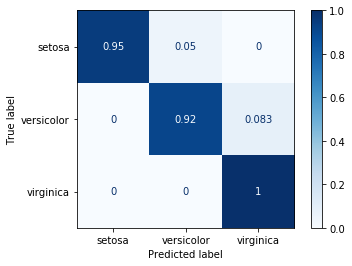

Rodada: 1 - seed: 1117 - acurácia: 0.8888888888888888

Sensibilidade [ setosa: 1.0; versicolor: 0.9333333333333333; virginica: 0.7777777777777778; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.78      0.93      0.85        15
   virginica       0.93      0.78      0.85        18

    accuracy                           0.89        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.90      0.89      0.89        45



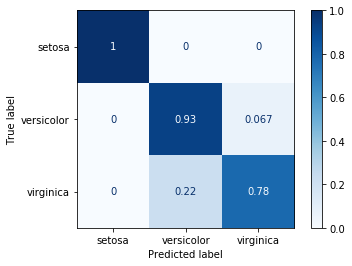

Rodada: 2 - seed: 3605 - acurácia: 0.9777777777777777

Sensibilidade [ setosa: 1.0; versicolor: 0.9333333333333333; virginica: 1.0; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      0.93      0.97        15
   virginica       0.95      1.00      0.97        18

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



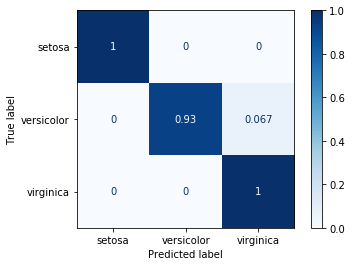

Rodada: 3 - seed: 6442 - acurácia: 0.9777777777777777

Sensibilidade [ setosa: 1.0; versicolor: 0.9473684210526315; virginica: 1.0; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.95      0.97        19
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



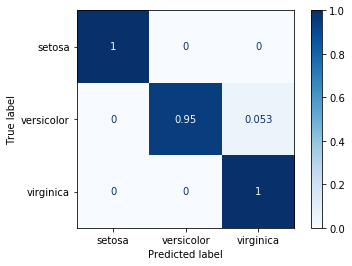

Rodada: 4 - seed: 702 - acurácia: 0.9555555555555556

Sensibilidade [ setosa: 1.0; versicolor: 0.9333333333333333; virginica: 0.9090909090909091; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      0.93      0.93        15
   virginica       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



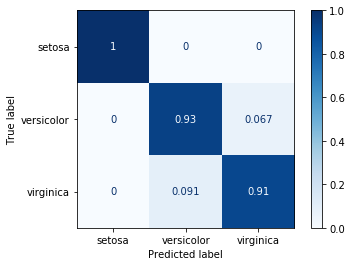

Rodada: 5 - seed: 427 - acurácia: 1.0

Sensibilidade [ setosa: 1.0; versicolor: 1.0; virginica: 1.0; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00        18

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



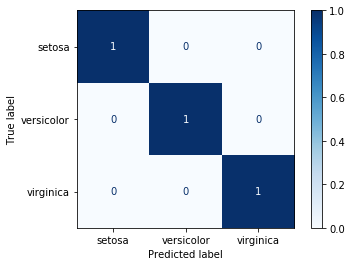

Rodada: 6 - seed: 7421 - acurácia: 0.9333333333333333

Sensibilidade [ setosa: 1.0; versicolor: 0.9166666666666666; virginica: 0.8888888888888888; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.85      0.92      0.88        12
   virginica       0.94      0.89      0.91        18

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



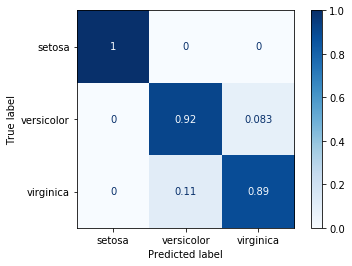

Rodada: 7 - seed: 2292 - acurácia: 0.9333333333333333

Sensibilidade [ setosa: 1.0; versicolor: 0.8125; virginica: 1.0; ]

              precision    recall  f1-score   support

      setosa       0.93      1.00      0.96        13
  versicolor       1.00      0.81      0.90        16
   virginica       0.89      1.00      0.94        16

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



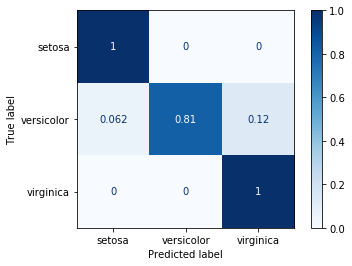

Rodada: 8 - seed: 5081 - acurácia: 0.9111111111111111

Sensibilidade [ setosa: 1.0; versicolor: 0.9285714285714286; virginica: 0.8125; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.81      0.93      0.87        14
   virginica       0.93      0.81      0.87        16

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



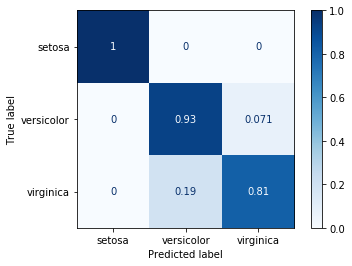

Rodada: 9 - seed: 5258 - acurácia: 0.9777777777777777

Sensibilidade [ setosa: 1.0; versicolor: 1.0; virginica: 0.9411764705882353; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.94      1.00      0.97        16
   virginica       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



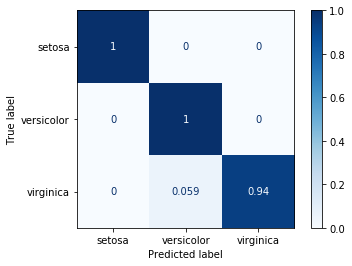

Rodada: 10 - seed: 8169 - acurácia: 0.9555555555555556

Sensibilidade [ setosa: 1.0; versicolor: 0.9411764705882353; virginica: 0.9; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.94      0.94      0.94        17
   virginica       0.90      0.90      0.90        10

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



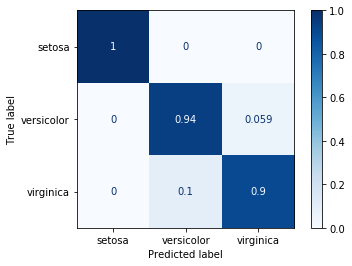

Rodada: 11 - seed: 8025 - acurácia: 0.9777777777777777

Sensibilidade [ setosa: 1.0; versicolor: 1.0; virginica: 0.95; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.95      0.97        20

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



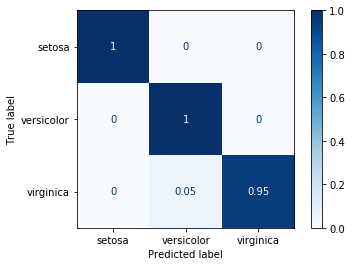

Rodada: 12 - seed: 7583 - acurácia: 1.0

Sensibilidade [ setosa: 1.0; versicolor: 1.0; virginica: 1.0; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



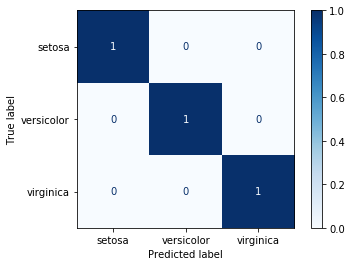

Rodada: 13 - seed: 5061 - acurácia: 0.9555555555555556

Sensibilidade [ setosa: 1.0; versicolor: 1.0; virginica: 0.8666666666666667; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.86      1.00      0.92        12
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



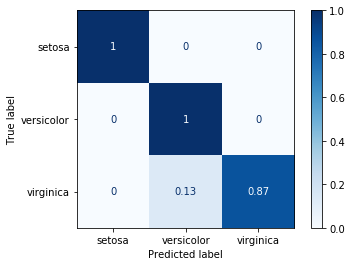

Rodada: 14 - seed: 7970 - acurácia: 0.9111111111111111

Sensibilidade [ setosa: 1.0; versicolor: 0.7142857142857143; virginica: 1.0; ]

              precision    recall  f1-score   support

      setosa       0.83      1.00      0.91        15
  versicolor       1.00      0.71      0.83        14
   virginica       0.94      1.00      0.97        16

    accuracy                           0.91        45
   macro avg       0.92      0.90      0.90        45
weighted avg       0.92      0.91      0.91        45



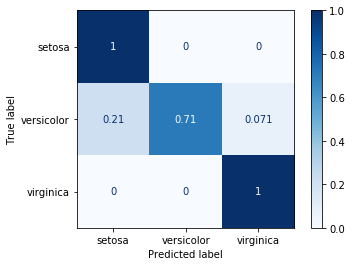

Rodada: 15 - seed: 6498 - acurácia: 0.9111111111111111

Sensibilidade [ setosa: 0.9333333333333333; versicolor: 0.8888888888888888; virginica: 0.9166666666666666; ]

              precision    recall  f1-score   support

      setosa       0.93      0.93      0.93        15
  versicolor       0.89      0.89      0.89        18
   virginica       0.92      0.92      0.92        12

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



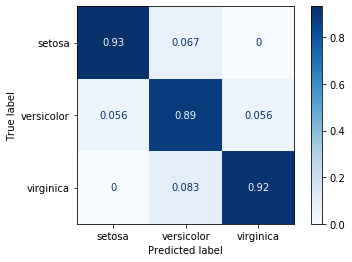

Rodada: 16 - seed: 1312 - acurácia: 1.0

Sensibilidade [ setosa: 1.0; versicolor: 1.0; virginica: 1.0; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      1.00      1.00        16
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



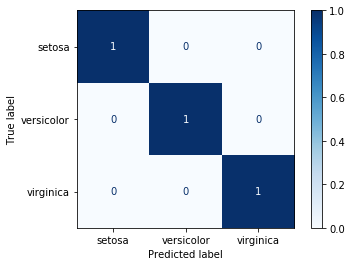

Rodada: 17 - seed: 2815 - acurácia: 0.9333333333333333

Sensibilidade [ setosa: 1.0; versicolor: 0.9166666666666666; virginica: 0.9047619047619048; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.85      0.92      0.88        12
   virginica       0.95      0.90      0.93        21

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45



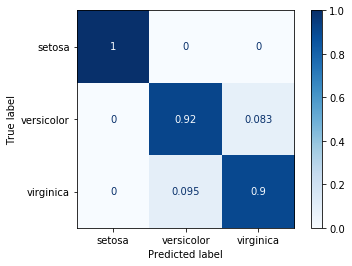

Rodada: 18 - seed: 7151 - acurácia: 0.9333333333333333

Sensibilidade [ setosa: 1.0; versicolor: 0.9285714285714286; virginica: 0.9047619047619048; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.87      0.93      0.90        14
   virginica       0.95      0.90      0.93        21

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45



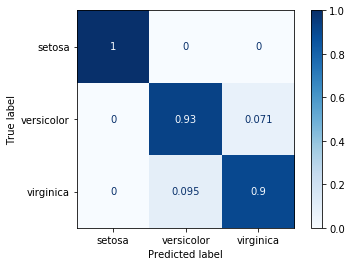

Rodada: 19 - seed: 6147 - acurácia: 0.8888888888888888

Sensibilidade [ setosa: 1.0; versicolor: 0.7777777777777778; virginica: 0.9166666666666666; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.78      0.85        18
   virginica       0.73      0.92      0.81        12

    accuracy                           0.89        45
   macro avg       0.89      0.90      0.89        45
weighted avg       0.90      0.89      0.89        45



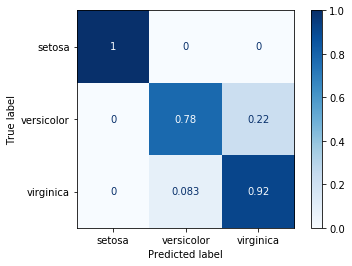

Rodada: 20 - seed: 6318 - acurácia: 0.9333333333333333

Sensibilidade [ setosa: 1.0; versicolor: 0.9230769230769231; virginica: 0.875; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.86      0.92      0.89        13
   virginica       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



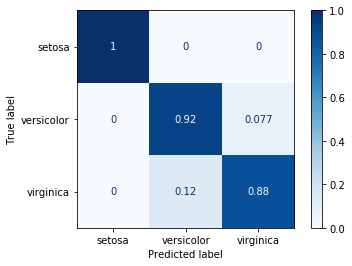

Rodada: 21 - seed: 8704 - acurácia: 0.9555555555555556

Sensibilidade [ setosa: 1.0; versicolor: 1.0; virginica: 0.8947368421052632; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.86      1.00      0.92        12
   virginica       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



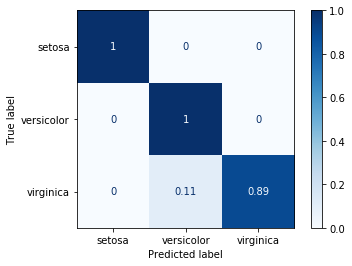

Rodada: 22 - seed: 3326 - acurácia: 0.9777777777777777

Sensibilidade [ setosa: 1.0; versicolor: 0.9375; virginica: 1.0; ]

              precision    recall  f1-score   support

      setosa       0.94      1.00      0.97        15
  versicolor       1.00      0.94      0.97        16
   virginica       1.00      1.00      1.00        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



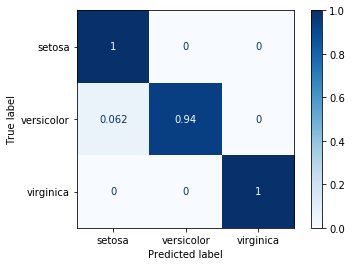

Rodada: 23 - seed: 7486 - acurácia: 0.9111111111111111

Sensibilidade [ setosa: 1.0; versicolor: 0.8421052631578947; virginica: 0.9166666666666666; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.84      0.89        19
   virginica       0.79      0.92      0.85        12

    accuracy                           0.91        45
   macro avg       0.91      0.92      0.91        45
weighted avg       0.92      0.91      0.91        45



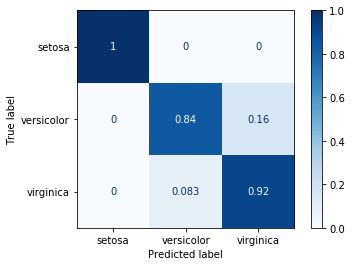

Rodada: 24 - seed: 7334 - acurácia: 0.9333333333333333

Sensibilidade [ setosa: 1.0; versicolor: 0.75; virginica: 1.0; ]

              precision    recall  f1-score   support

      setosa       0.94      1.00      0.97        17
  versicolor       1.00      0.75      0.86        12
   virginica       0.89      1.00      0.94        16

    accuracy                           0.93        45
   macro avg       0.94      0.92      0.92        45
weighted avg       0.94      0.93      0.93        45



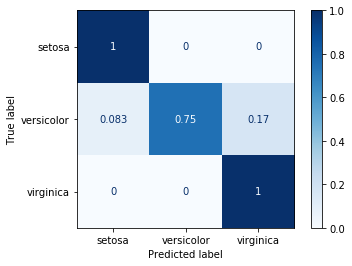

Rodada: 25 - seed: 2389 - acurácia: 0.9777777777777777

Sensibilidade [ setosa: 1.0; versicolor: 0.9444444444444444; virginica: 1.0; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.94      0.97        18
   virginica       0.91      1.00      0.95        10

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



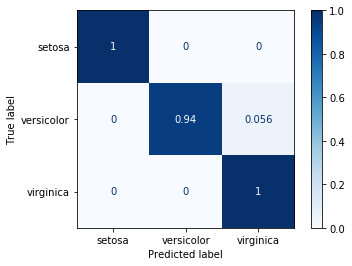

Rodada: 26 - seed: 7580 - acurácia: 0.9555555555555556

Sensibilidade [ setosa: 1.0; versicolor: 0.9; virginica: 1.0; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.90      0.95        20
   virginica       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.97      0.96        45
weighted avg       0.96      0.96      0.96        45



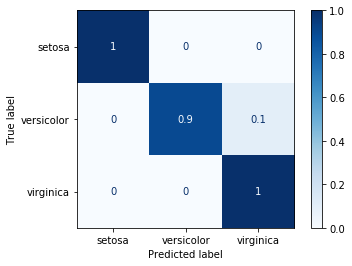

Rodada: 27 - seed: 6957 - acurácia: 0.9555555555555556

Sensibilidade [ setosa: 1.0; versicolor: 0.8823529411764706; virginica: 1.0; ]

              precision    recall  f1-score   support

      setosa       0.95      1.00      0.97        18
  versicolor       1.00      0.88      0.94        17
   virginica       0.91      1.00      0.95        10

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.95        45



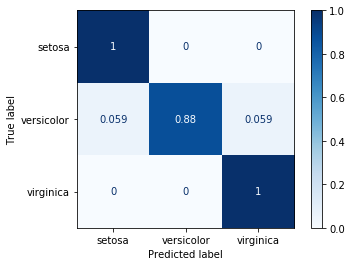

Rodada: 28 - seed: 120 - acurácia: 0.9333333333333333

Sensibilidade [ setosa: 0.9473684210526315; versicolor: 0.9166666666666666; virginica: 0.9285714285714286; ]

              precision    recall  f1-score   support

      setosa       0.95      0.95      0.95        19
  versicolor       0.85      0.92      0.88        12
   virginica       1.00      0.93      0.96        14

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



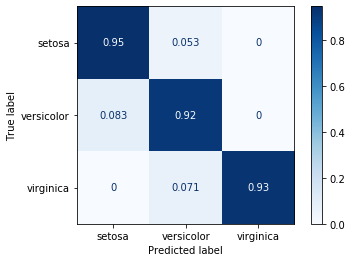

Rodada: 29 - seed: 7470 - acurácia: 0.9111111111111111

Sensibilidade [ setosa: 1.0; versicolor: 0.9333333333333333; virginica: 0.8; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.87        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



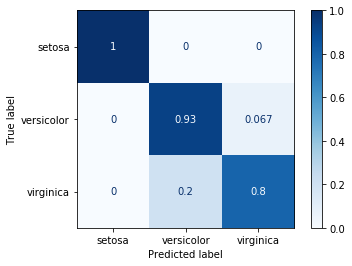

In [5]:
# Declarando listas para armazenar acurácia, sensibilidade, matriz de confusão e semente randomica de cada rodada
acc, rec, mat, sup = [], [], [], []
rodada = 0

# Gerando 30 sementes para distribuição dos dados
seed_list = np.random.randint(0, 9000, 30)

# 30 rodadas de classificação
for seed in seed_list:
    # Distribuindo os dados
    X_pre_train, X_pre_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # Instanciando Standard Scaler
    sc = StandardScaler().fit(X_pre_train)

    # Pré-processando dados
    X_train = sc.transform(X_pre_train)
    X_test = sc.transform(X_pre_test)

    # Instanciando e treinando classificador
    classifier = MLPClassifier(
        hidden_layer_sizes=best_hidden_layer_sizes,
        solver='lbfgs',
        activation='tanh'
    ).fit(
        X_train,
        y_train
    )

    # Realizando predição
    y_pred = classifier.predict(X_test)

    # Gerando resultados
    acuracia = accuracy_score(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred, normalize='true')
    sensibilidade = recall_score(y_test, y_pred, average=None)
    setosa, versicolor, virginica = sensibilidade
    registro = classification_report(y_test, y_pred, target_names=irisDS.target_names, output_dict=True)

    # Adicionando resultados às respectivas listas
    acc.append(acuracia)
    rec.append(sensibilidade)
    mat.append(matrix)
    sup.append([registro[label]['support'] for label in irisDS.target_names])

    # Exibindo resultados
    print(f'Rodada: {rodada} - seed: {seed} - acurácia: {acuracia}\n')

    print(f'Sensibilidade [ setosa: {setosa}; versicolor: {versicolor}; virginica: {virginica}; ]\n')

    print(classification_report(y_test, y_pred, target_names=irisDS.target_names))
    
    plot_confusion_matrix(
        estimator=classifier,
        X=X_test,
        y_true=y_test,
        cmap=plt.cm.Blues,
        normalize='true',
        display_labels=irisDS.target_names
    )
    plt.show()
    rodada += 1

### Observando distribuição das classes nos grupos de teste 

In [6]:
splitDF = pd.DataFrame(data=sup, columns=irisDS.target_names)
splitDFdescribe = splitDF.describe()
splitDF['seed'] = seed_list
splitDF

,setosa,versicolor,virginica,seed
0,20,12,13,583
1,12,15,18,1117
2,12,15,18,3605
3,14,19,12,6442
4,19,15,11,702
5,15,12,18,427
6,15,12,18,7421
7,13,16,16,2292
8,15,14,16,5081
9,12,16,17,5258


In [7]:
splitDFdescribe

,setosa,versicolor,virginica
count,30.000000,30.000000,30.000000
mean,15.333333,14.700000,14.966667
std,2.509751,2.781094,3.264050
min,10.000000,9.000000,10.000000
25%,14.000000,12.000000,12.000000
50%,15.000000,15.000000,15.000000
75%,17.000000,16.750000,17.750000
max,20.000000,20.000000,21.000000


### Observando Métricas de Acurácia e Sensibilidade

In [8]:
metricsDF = pd.DataFrame(data=rec, columns=[f'S - {classe}' for classe in irisDS.target_names])
metricsDF['Acurácia'] = acc
metricsDF

,S - setosa,S - versicolor,S - virginica,Acurácia
0,0.950000,0.916667,1.000000,0.955556
1,1.000000,0.933333,0.777778,0.888889
2,1.000000,0.933333,1.000000,0.977778
3,1.000000,0.947368,1.000000,0.977778
4,1.000000,0.933333,0.909091,0.955556
5,1.000000,1.000000,1.000000,1.000000
6,1.000000,0.916667,0.888889,0.933333
7,1.000000,0.812500,1.000000,0.933333
8,1.000000,0.928571,0.812500,0.911111
9,1.000000,1.000000,0.941176,0.977778


In [9]:
metricsDF.describe()

,S - setosa,S - versicolor,S - virginica,Acurácia
count,30.000000,30.000000,30.000000,30.000000
mean,0.994357,0.917287,0.936798,0.947407
std,0.017379,0.074150,0.066910,0.031688
min,0.933333,0.714286,0.777778,0.888889
25%,1.000000,0.904167,0.901190,0.933333
50%,1.000000,0.930952,0.934874,0.955556
75%,1.000000,0.946637,1.000000,0.977778
max,1.000000,1.000000,1.000000,1.000000


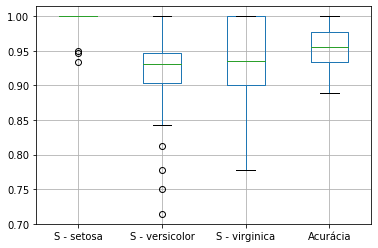

In [10]:
metricsDF.boxplot()